<a href="https://colab.research.google.com/github/shoreey/Child_Poverty_in_Local_Government/blob/main/Westminister.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# File path
file_path = r"Child Poverty.xlsx"

# Reading both sheets into separate DataFrames
local_authority = pd.read_excel(file_path, sheet_name='local_authority')
ward = pd.read_excel(file_path, sheet_name='ward')

# Displaying first 5 rows to verify the data
print("Local Authority Data:")
print(local_authority.head())

print("\nWard Data:")
print(ward.head())


Local Authority Data:
                     LA  2018/19  2019/20  2020/21  2021/22  2022/23  \
0  Barking and Dagenham    15397    16607    14884    13520    13037   
1                Barnet    10677    11475    10657     9486     9262   
2                Bexley     7606     8270     7425     6663     6349   
3                 Brent    13006    14028    13306    11905    11312   
4               Bromley     7547     7853     7214     6108     5793   

   Female Under 4  Female 4-9  Female 10 -14  Males Under 4  Males 4-9  \
0            8500        8900           8800           8800       9400   
1           11700       12200          12500          12400      13000   
2            7400        7900           8000           7600       8300   
3            9800        9700          10200          10200      10200   
4            9500       10100          10100          10000      10600   

   Males under 14  Total Under 4  Total aged 4-9  Total aged 9-14  \
0            9400          1720

C:\Users\shaur\AppData\Local\Temp\ipykernel_15664\4089495879.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


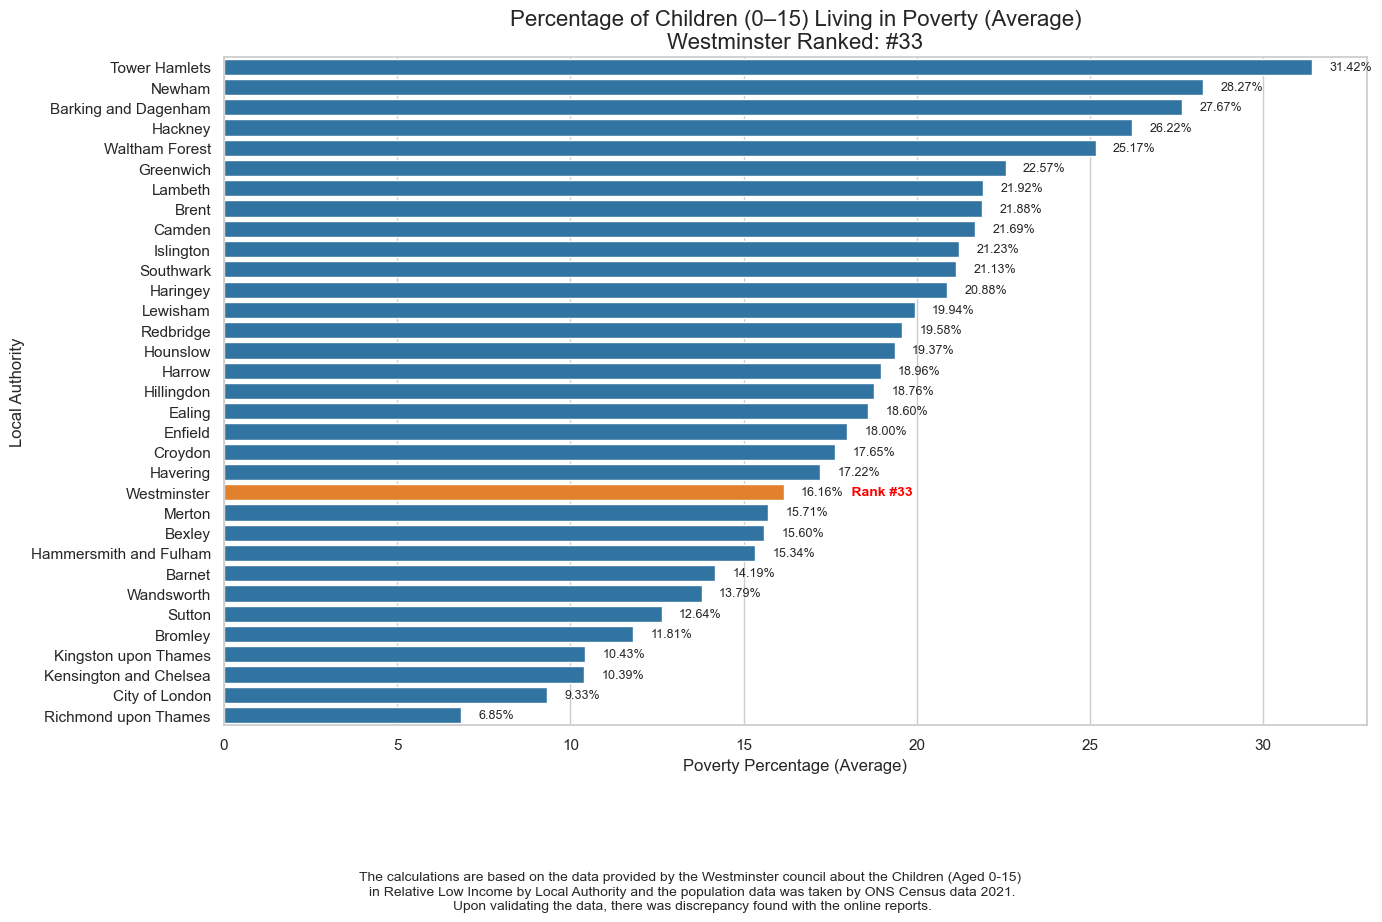

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort data by the average poverty percentage (highest to lowest)
local_authority_sorted = local_authority.sort_values(by='Average', ascending=False)

# Highlight Westminster (assign a specific color)
colors = ['#1f77b4' if la != 'Westminster' else '#ff7f0e' for la in local_authority_sorted['LA']]

# Calculate Westminster's rank based on the average poverty percentage
westminster_rank = local_authority_sorted[local_authority_sorted['LA'] == 'Westminster'].index[0] + 1

# Plotting the bar chart
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x='Average',
    y='LA',
    data=local_authority_sorted,
    palette=colors
)

# Add labels and title
plt.xlabel('Poverty Percentage (Average)', fontsize=12)
plt.ylabel('Local Authority', fontsize=12)
plt.title('Percentage of Children (0–15) Living in Poverty (Average)\nWestminster Ranked: #{}'.format(westminster_rank), fontsize=16)

# Annotate each bar with the percentage
for index, value in enumerate(local_authority_sorted['Average']):
    la = local_authority_sorted['LA'].iloc[index]
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=9)
    if la == 'Westminster':
        plt.text(value + 1.5, index, f'    Rank #{westminster_rank}', color='red', va='center', fontsize=10, fontweight='bold')

# Add a note at the bottom of the graph
note = """The calculations are based on the data provided by the Westminster council about the Children (Aged 0-15)
in Relative Low Income by Local Authority and the population data was taken by ONS Census data 2021.
Upon validating the data, there was discrepancy found with the online reports."""

plt.figtext(0.5, -0.1, note, ha="center", va="top", fontsize=10, wrap=True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Reading the 'local_authority' sheet
local_authority = pd.read_excel(file_path, sheet_name='local_authority')

# Filter for Westminster data
westminster_data = local_authority[local_authority['LA'].str.contains('Westminster', case=False)]

# Extract yearly poverty numbers
years = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']
poverty_numbers = westminster_data[years].values.flatten()

# Calculate absolute change (current year - previous year)
absolute_change = pd.Series(poverty_numbers).diff().fillna(0)

# Calculate percentage change
percentage_change = pd.Series(poverty_numbers).pct_change().fillna(0) * 100

# Prepare the dataframe
westminster_changes = pd.DataFrame({
    'Year': years,
    'Poverty_Numbers': poverty_numbers,
    'Absolute_Change': absolute_change.round(0).astype(int),
    'Percentage_Change': percentage_change.round(2)
})

# Display results
print(westminster_changes)


      Year  Poverty_Numbers  Absolute_Change  Percentage_Change
0  2018/19             4388                0               0.00
1  2019/20             4464               76               1.73
2  2020/21             4057             -407              -9.12
3  2021/22             3809             -248              -6.11
4  2022/23             3522             -287              -7.53


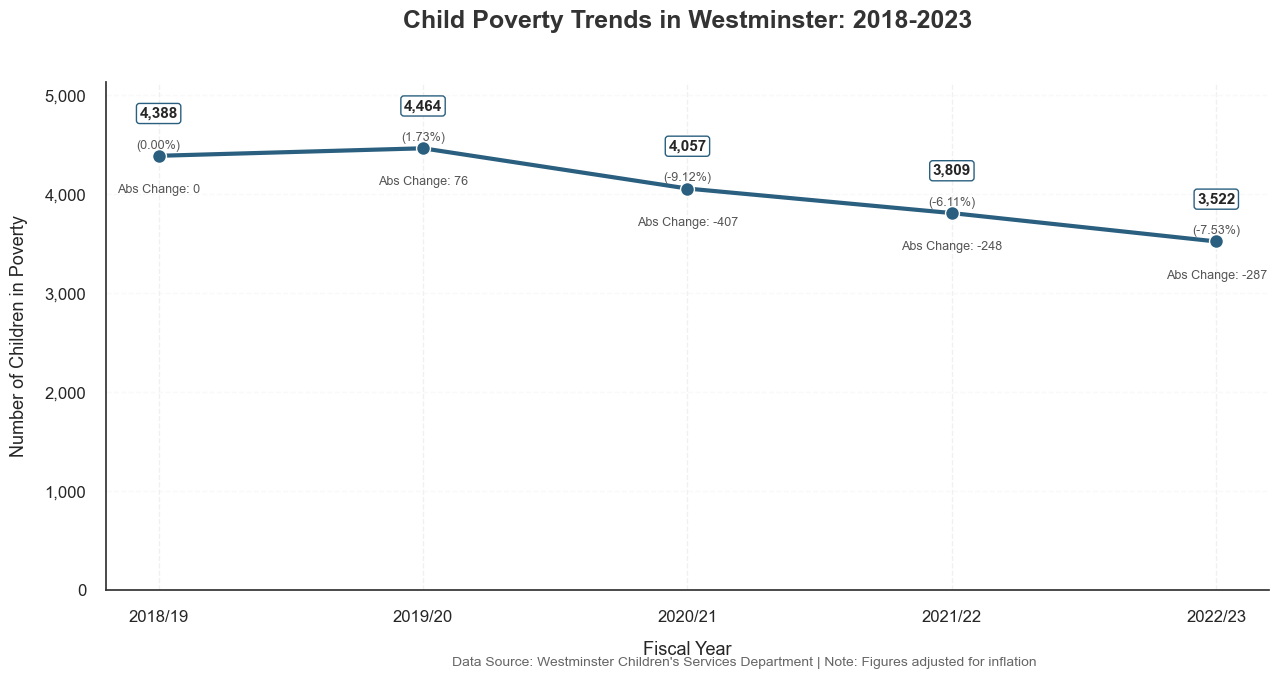

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Professional styling setup
sns.set_style("whitegrid", {'grid.color': '#f0f0f0', 'grid.linestyle': '--'})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.edgecolor'] = '#333333'

fig, ax = plt.subplots(figsize=(13, 7))

# Plot with improved visual hierarchy
line = ax.plot(westminster_changes['Year'],
               westminster_changes['Poverty_Numbers'],
               marker='o',
               linestyle='-',
               color='#2a5f7f',  # Darker professional blue
               markersize=10,
               linewidth=3,
               markeredgecolor='w',
               markerfacecolor='#2a5f7f')

# Data labels with improved positioning and styling
for idx, (year, value, abs_change, pct_change) in enumerate(zip(westminster_changes['Year'],
                                                               westminster_changes['Poverty_Numbers'],
                                                               westminster_changes['Absolute_Change'],
                                                               westminster_changes['Percentage_Change'])):
    # Place the label for the poverty number
    ax.text(year,
            value + (0.08 * max(westminster_changes['Poverty_Numbers'])),  # Dynamic positioning
            f'{value:,}',  # Format with thousands separator
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold',
            bbox=dict(facecolor='white',
                      edgecolor='#2a5f7f',
                      boxstyle='round,pad=0.2'))

    # Place the label for the absolute change
    ax.text(year,
            value + (-0.09 * max(westminster_changes['Poverty_Numbers'])),  # Dynamic positioning
            f'Abs Change: {abs_change:,}',  # Format with thousands separator
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='normal',
            color='#555555')

    # Place the label for the percentage change
    ax.text(year,
            value + (0.01 * max(westminster_changes['Poverty_Numbers'])),  # Dynamic positioning
            f'({pct_change:.2f}%)',  # Format percentage
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='normal',
            color='#555555')

# Enhanced title and labels
ax.set_title("Child Poverty Trends in Westminster: 2018-2023\n",
             fontsize=18,
             fontweight='semibold',
             pad=20,
             color='#333333')
ax.set_xlabel("Fiscal Year",
             fontsize=13,
             labelpad=12,
             fontweight='medium')
ax.set_ylabel("Number of Children in Poverty",
             fontsize=13,
             labelpad=12,
             fontweight='medium')

# Axis formatting improvements
ax.xaxis.set_tick_params(labelsize=12, pad=8)
ax.yaxis.set_tick_params(labelsize=12, pad=8)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))
ax.set_ylim(0, max(westminster_changes['Poverty_Numbers']) * 1.15)

# Professional grid and spines
ax.grid(axis='y', alpha=0.4)
ax.spines[['top','right']].set_visible(False)

# Annotation for data source
plt.text(0.80, -0.15,
        "Data Source: Westminster Children's Services Department | Note: Figures adjusted for inflation",
        transform=ax.transAxes,
        ha='right',
        fontsize=10,
        color='#666666')

plt.tight_layout()
plt.show()


Percentiles:
{'25th Percentile': 7.491834695431647, '50th Percentile': 9.06401313719622, '95th Percentile': 16.660421378755274, '99th Percentile': 20.206244598187233}
                           Ward    Average         Group
0                    Abbey Road   2.104525           Low
1                     Bayswater   2.404580           Low
2                 Church Street  13.758599  Above Median
3                   Harrow Road  10.234899  Above Median
4                     Hyde Park  15.419948  Above Median
5   Knightsbridge and Belgravia   7.478491           Low
6                Lancaster Gate   8.483755  Below Median
7                 Little Venice   7.531866  Below Median
8                    Maida Vale   9.285051  Above Median
9                    Marylebone   4.734577           Low
10                Pimlico North  13.029827  Above Median
11                Pimlico South  15.783274  Above Median
12                 Queen's Park  15.878254  Above Median
13                Regent's Park   5

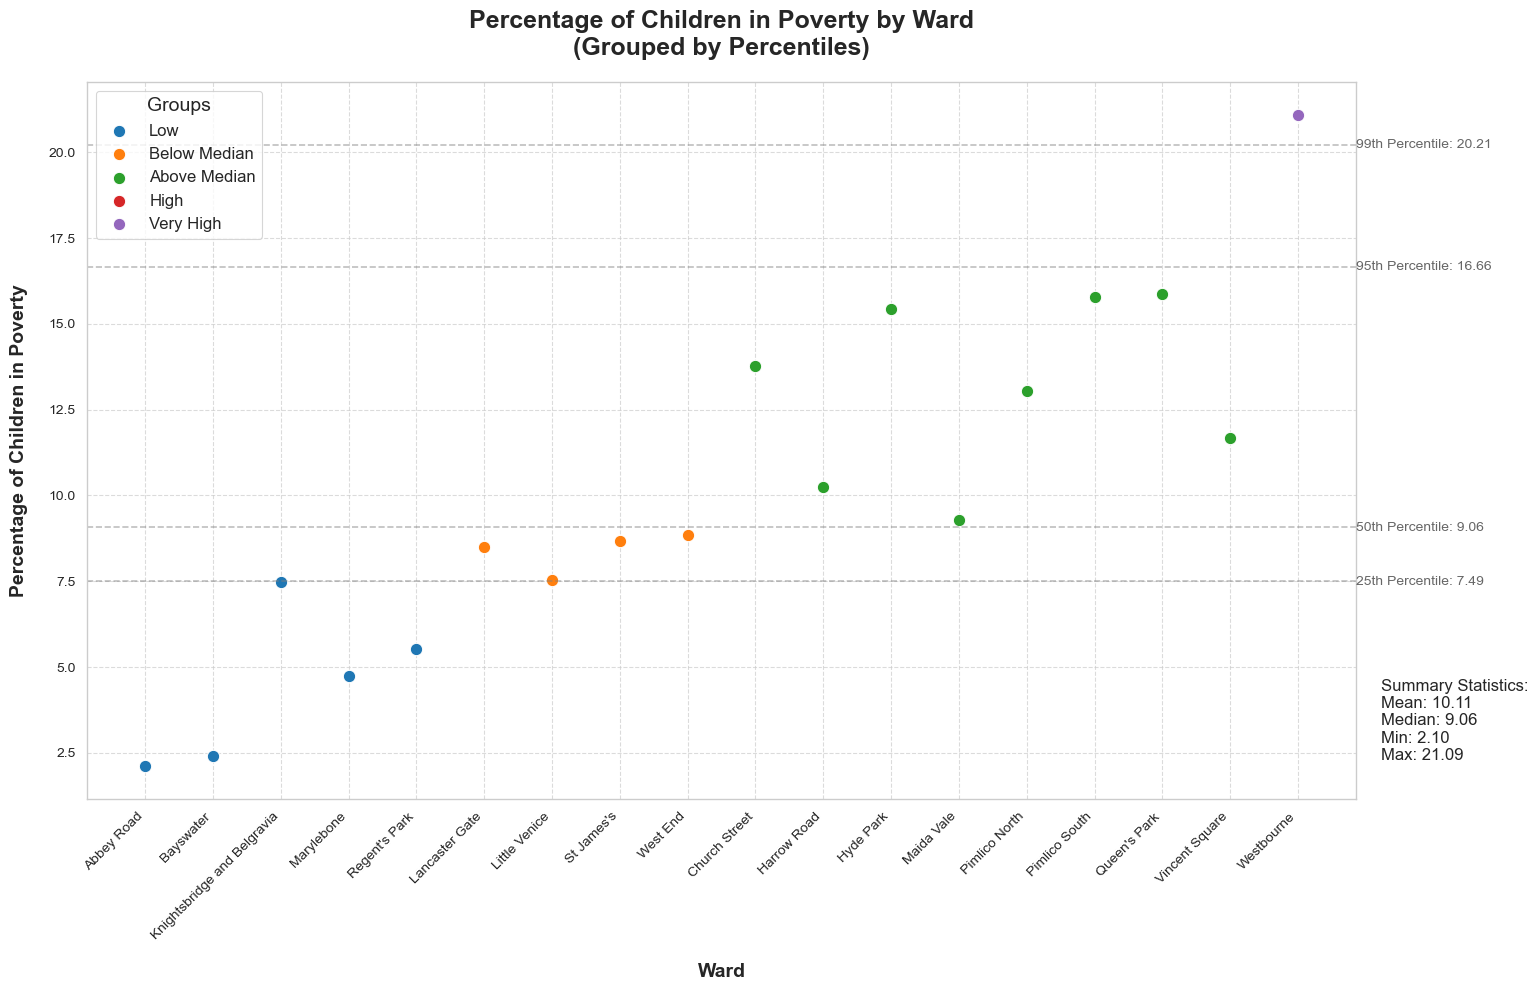

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ward' is your dataframe
# Example structure of ward dataframe
# ward = pd.DataFrame(...)  # Your actual data

# Calculate Percentiles (25th, 50th, 95th, 99th)
percentiles = np.percentile(ward['Average'], [25, 50, 95, 99])
percentiles_dict = {
    "25th Percentile": percentiles[0],
    "50th Percentile": percentiles[1],
    "95th Percentile": percentiles[2],
    "99th Percentile": percentiles[3]
}

print(f"Percentiles:\n{percentiles_dict}")

# Group Wards based on the "Average" column and percentiles
ward['Group'] = pd.cut(ward['Average'], bins=[-np.inf, percentiles[0], percentiles[1], percentiles[2], percentiles[3], np.inf],
                       labels=['Low', 'Below Median', 'Above Median', 'High', 'Very High'])

# Display the new dataframe with groups
print(ward[['Ward', 'Average', 'Group']])

# Set the style for the plot
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_palette("deep")

# Create the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Create a color map for different groups
group_colors = {'Low': '#1f77b4', 'Below Median': '#ff7f0e', 'Above Median': '#2ca02c', 'High': '#d62728', 'Very High': '#9467bd'}

# Plot each group
for group, color in group_colors.items():
    group_data = ward[ward['Group'] == group]
    ax.scatter(group_data['Ward'], group_data['Average'], label=group, color=color, s=80, alpha=1.0, edgecolors='w')  # Increased alpha for darker scatter

# Customize the plot
ax.set_xlabel('Ward', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Percentage of Children in Poverty', fontsize=14, fontweight='bold', labelpad=15)
ax.set_title('Percentage of Children in Poverty by Ward\n(Grouped by Percentiles)', fontsize=18, fontweight='bold', pad=20)

# Rotate x-axis labels and adjust their alignment
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a legend in the top-left corner
legend = ax.legend(title='Groups', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(0, 1))

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Add percentile lines
for percentile, value in percentiles_dict.items():
    ax.axhline(y=value, color='gray', linestyle='--', alpha=0.5)
    ax.text(ax.get_xlim()[1], value, f'{percentile}: {value:.2f}', va='center', ha='left', fontsize=10, alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
fig.subplots_adjust(right=0.85)  # Make room for the legend

# Add a text box with summary statistics
stats_text = f"Summary Statistics:\n"
stats_text += f"Mean: {ward['Average'].mean():.2f}\n"
stats_text += f"Median: {ward['Average'].median():.2f}\n"
stats_text += f"Min: {ward['Average'].min():.2f}\n"
stats_text += f"Max: {ward['Average'].max():.2f}"

plt.text(1.02, 0.05, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()


In [ ]:
import pandas as pd

# Assuming the DataFrame 'ward' has the following structure
# ward = pd.DataFrame({
#     'Ward': ['Ward1', 'Ward2', 'Ward3'],
#     '2018/19': [100, 150, 120],
#     '2019/20': [110, 160, 130],
#     '2020/21': [120, 170, 140],
#     '2021/22': [130, 180, 150],
#     '2022/23': [140, 190, 160]
# })

# Calculate Year-on-Year Changes
years = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']
ward_changes = ward.copy()

# For each year, calculate the year-on-year change and store it in a new column
for i in range(1, len(years)):
    year_col = f'Change_{years[i]}'
    ward_changes[year_col] = ward[years[i]] - ward[years[i-1]]

# Display the DataFrame with the changes
print(ward_changes[['Ward'] + [f'Change_{year}' for year in years[1:]]])

# Optionally, you can also add percentage change
for i in range(1, len(years)):
    pct_change_col = f'Pct_Change_{years[i]}'
    ward_changes[pct_change_col] = (ward[years[i]] - ward[years[i-1]]) / ward[years[i-1]] * 100

# Display the DataFrame with both absolute and percentage changes
print(ward_changes[['Ward'] + [f'Change_{year}' for year in years[1:]] + [f'Pct_Change_{year}' for year in years[1:]]])


                           Ward  Change_2019/20  Change_2020/21  \
0                    Abbey Road              11             -17   
1                     Bayswater             -17              -6   
2                 Church Street               3             -91   
3                   Harrow Road             -53             -13   
4                     Hyde Park              12             -16   
5   Knightsbridge and Belgravia             -35             -13   
6                Lancaster Gate              12             -12   
7                 Little Venice              -4               7   
8                    Maida Vale              -6               8   
9                    Marylebone              16             -25   
10                Pimlico North              21             -17   
11                Pimlico South              21             -58   
12                 Queen's Park             -10             -47   
13                Regent's Park             -11              -

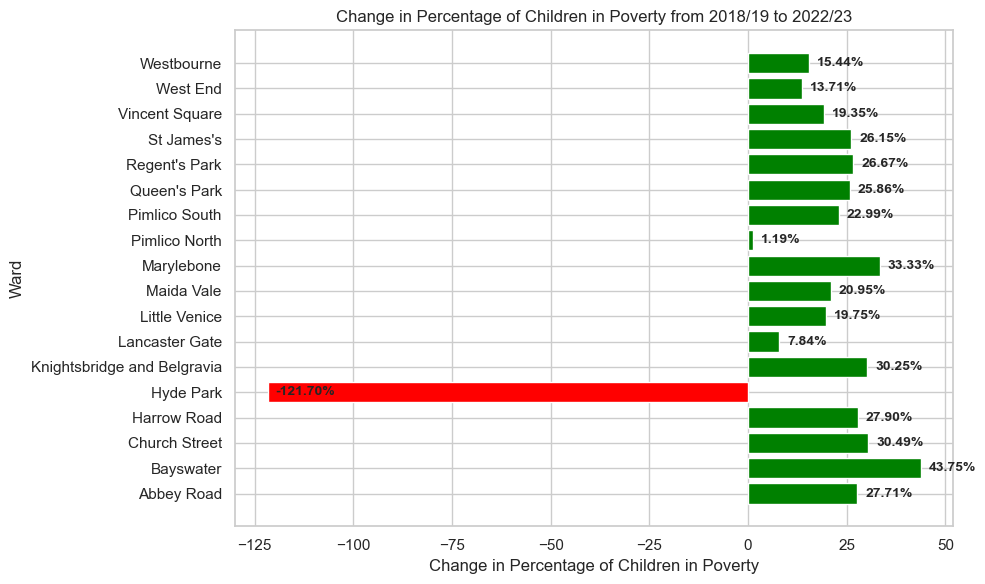

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'ward' DataFrame already has a 'Change' column calculated.
# Multiply the 'Change' values by 100 to convert them to percentages
ward['Change'] = ward['Change'] * 100

# Create a horizontal bar chart to visualize the change
plt.figure(figsize=(10, 6))
plt.barh(ward['Ward'], ward['Change'], color=ward['Change'].apply(lambda x: 'green' if x > 0 else 'red'))

# Add labels and title
plt.xlabel('Change in Percentage of Children in Poverty')
plt.ylabel('Ward')
plt.title('Change in Percentage of Children in Poverty from 2018/19 to 2022/23')

# Add data labels on the bars
for index, value in enumerate(ward['Change']):
    plt.text(value + 2, index, f'{value:.2f}%', va='center', fontsize=10, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()
